# <span style="color:darkorange"> Stationaire tijdsreeksen demo

In [135]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf
%matplotlib inline
plt.style.use('seaborn')
import numpy as np

We gaan starten met het inlezen van het bestand: `bezoekers.csv` maar we gaan de kolom Tijdstip gebruiken als de index van de dataframe.

In [136]:
df = pd.read_csv("data/bezoekers.csv", index_col='Tijdstip')
df

,dagelijks aantal bezoekers (in honderden)
Tijdstip,
0,17
1,13
2,14
3,17
4,17
5,14
6,21
7,20
8,10


## <span style="color:deeppink"> Stationair? </span>
Plot het aantal bezoekers en ga na of de dataset stationair is.

Text(0, 0.5, 'Bezoekers in hondertallen')

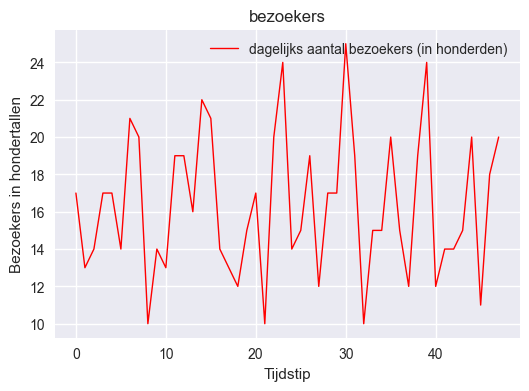

In [137]:
df.plot(color='red', linewidth=1, figsize=(6,4))
plt.title('bezoekers')
plt.ylabel('Bezoekers in hondertallen')

In [138]:
from sklearn.linear_model import LinearRegression

x = df.index.values
y = df['dagelijks aantal bezoekers (in honderden)'].values

l = LinearRegression()
l.fit(x.reshape(-1,1),y)

print(f'Intercept = {l.intercept_}')
print(f'Richtingcoef = {l.coef_[0]}')


Intercept = 16.083333333333332
Richtingcoef = 0.010638297872340415


<AxesSubplot:xlabel='Tijdstip'>

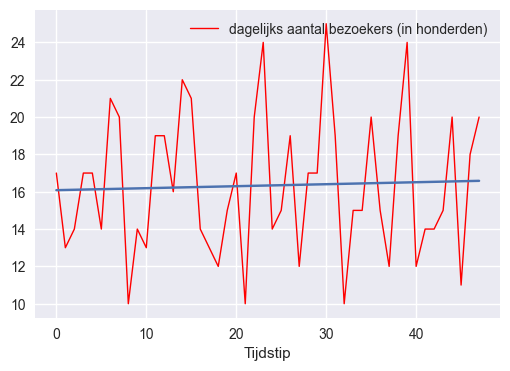

In [139]:
df.plot(color='red', linewidth=1, figsize=(6,4))
sns.lineplot(x=x,y=l.predict(x.reshape(-1,1)))

## <span style="color:deeppink"> Autocorrelatie </span>

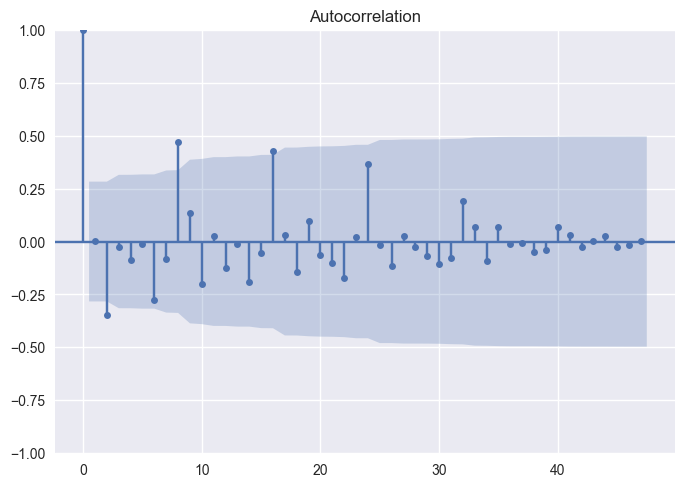

In [140]:
fig = plot_acf(df['dagelijks aantal bezoekers (in honderden)'],lags=len(df)-1)

## <span style="color:deeppink"> Moving average </span>
Bereken de 3-punts moving average aan de hand van de functies:  
`rolling`:  
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.rolling.html  
deze functie zorgt voor een sliding window over je kolom. => Hier pas je dan de gewenste statistische functie op toe  
En de functie   
    `shift`: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.shift.html  
zorg je ervoor dat alle waarden een rij naar beneden schuiven.

In [141]:
df['MA_3'] = df['dagelijks aantal bezoekers (in honderden)'].rolling(3).mean().shift(1)

Text(0, 0.5, 'bezokers')

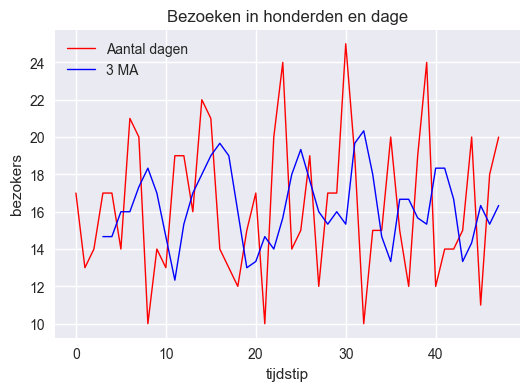

In [142]:
df.plot(color=['red','blue'], linewidth=1,figsize=(6,4))
plt.legend(labels = ['Aantal dagen','3 MA'])
plt.title('Bezoeken in honderden en dage')
plt.xlabel('tijdstip')
plt.ylabel('bezokers')

## <span style="color:deeppink"> Mean absolute error
Bereken de absolute error van de 3-punts moving average:

In [143]:
df['absoluut error_3'] = abs(df['dagelijks aantal bezoekers (in honderden)']-df['MA_3'])
mae = df['absoluut error_3'].mean()
print(mae)
df

4.059259259259259


,dagelijks aantal bezoekers (in honderden),MA_3,absoluut error_3
Tijdstip,,,
0,17,NaN,NaN
1,13,NaN,NaN
2,14,NaN,NaN
3,17,14.666667,2.333333
4,17,14.666667,2.333333
5,14,16.000000,2.000000
6,21,16.000000,5.000000
7,20,17.333333,2.666667
8,10,18.333333,8.333333


## <span style="color:deeppink"> Mean absolute percentage error

In [144]:
df['absoluut procent_3'] = (df['absoluut error_3'] /df['dagelijks aantal bezoekers (in honderden)'])*100
mae = df['absoluut procent_3'].mean()
print(mae)
df

26.513994842701415


,dagelijks aantal bezoekers (in honderden),MA_3,absoluut error_3,absoluut procent_3
Tijdstip,,,,
0,17,NaN,NaN,NaN
1,13,NaN,NaN,NaN
2,14,NaN,NaN,NaN
3,17,14.666667,2.333333,13.725490
4,17,14.666667,2.333333,13.725490
5,14,16.000000,2.000000,14.285714
6,21,16.000000,5.000000,23.809524
7,20,17.333333,2.666667,13.333333
8,10,18.333333,8.333333,83.333333


## <span style="color:deeppink"> Exponentiele demping:
Gebruik de functie `emw` om exponentiele demping toe te passen:  
    https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.ewm.html

In [145]:
df['exp_demping'] = df['dagelijks aantal bezoekers (in honderden)'].ewm(alpha=0.5, adjust=False).mean().shift(1)
df

,dagelijks aantal bezoekers (in honderden),MA_3,absoluut error_3,absoluut procent_3,exp_demping
Tijdstip,,,,,
0,17,NaN,NaN,NaN,NaN
1,13,NaN,NaN,NaN,17.000000
2,14,NaN,NaN,NaN,15.000000
3,17,14.666667,2.333333,13.725490,14.500000
4,17,14.666667,2.333333,13.725490,15.750000
5,14,16.000000,2.000000,14.285714,16.375000
6,21,16.000000,5.000000,23.809524,15.187500
7,20,17.333333,2.666667,13.333333,18.093750
8,10,18.333333,8.333333,83.333333,19.046875


In [146]:
df['absoluut error_exp'] = abs(df['dagelijks aantal bezoekers (in honderden)']-df['exp_demping'])
mae = df['absoluut error_exp'].mean()
print(mae)
df

3.826834944491195


,dagelijks aantal bezoekers (in honderden),MA_3,absoluut error_3,absoluut procent_3,exp_demping,absoluut error_exp
Tijdstip,,,,,,
0,17,NaN,NaN,NaN,NaN,NaN
1,13,NaN,NaN,NaN,17.000000,4.000000
2,14,NaN,NaN,NaN,15.000000,1.000000
3,17,14.666667,2.333333,13.725490,14.500000,2.500000
4,17,14.666667,2.333333,13.725490,15.750000,1.250000
5,14,16.000000,2.000000,14.285714,16.375000,2.375000
6,21,16.000000,5.000000,23.809524,15.187500,5.812500
7,20,17.333333,2.666667,13.333333,18.093750,1.906250
8,10,18.333333,8.333333,83.333333,19.046875,9.046875


In [147]:
df['procentuele fout exp'] = (df['absoluut error_exp']/df['dagelijks aantal bezoekers (in honderden)'])*100
mae = df['procentuele fout exp'].mean()
print(mae)
df

25.29515223027449


,dagelijks aantal bezoekers (in honderden),MA_3,absoluut error_3,absoluut procent_3,exp_demping,absoluut error_exp,procentuele fout exp
Tijdstip,,,,,,,
0,17,NaN,NaN,NaN,NaN,NaN,NaN
1,13,NaN,NaN,NaN,17.000000,4.000000,30.769231
2,14,NaN,NaN,NaN,15.000000,1.000000,7.142857
3,17,14.666667,2.333333,13.725490,14.500000,2.500000,14.705882
4,17,14.666667,2.333333,13.725490,15.750000,1.250000,7.352941
5,14,16.000000,2.000000,14.285714,16.375000,2.375000,16.964286
6,21,16.000000,5.000000,23.809524,15.187500,5.812500,27.678571
7,20,17.333333,2.666667,13.333333,18.093750,1.906250,9.531250
8,10,18.333333,8.333333,83.333333,19.046875,9.046875,90.468750


## <span style="color:deeppink"> Zoek de optimale alpha

In [148]:
stap = 1e-3
alphas = np.arange(start=0+stap,stop=1+stap,step=stap)
df2 = pd.DataFrame()
mae=[]

for alpha in alphas[0:]:
    expo = []
    expo = df['dagelijks aantal bezoekers (in honderden)'].ewm(alpha=alpha, adjust=False).mean().shift()
    mae.append(abs(df['dagelijks aantal bezoekers (in honderden)']-expo).mean())

df2['mae'] = mae
df2.set_index(alphas, inplace=True)
df2.head()
minimum_mae = df2['mae'].min()
print(f"De laagste is {df2['mae'].min()}")
print("index: ", df2[df2['mae'] == minimum_mae].index[0])

De laagste is 3.277548181312891
index:  0.001


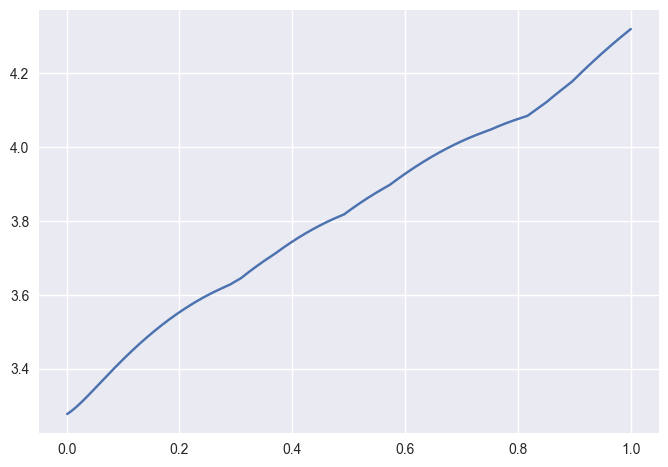

In [149]:
plt.plot(df2['mae'])

In [150]:
df['exponential_0.001'] = df['dagelijks aantal bezoekers (in honderden)'].ewm(alpha=0.001, adjust=False).mean().shift(1)
df.head()

,dagelijks aantal bezoekers (in honderden),MA_3,absoluut error_3,absoluut procent_3,exp_demping,absoluut error_exp,procentuele fout exp,exponential_0.001
Tijdstip,,,,,,,,
0,17,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,13,NaN,NaN,NaN,17.00,4.00,30.769231,17.000000
2,14,NaN,NaN,NaN,15.00,1.00,7.142857,16.996000
3,17,14.666667,2.333333,13.72549,14.50,2.50,14.705882,16.993004
4,17,14.666667,2.333333,13.72549,15.75,1.25,7.352941,16.993011


In [151]:
df['absolute error exp alpha 0.001'] = abs(df['dagelijks aantal bezoekers (in honderden)'] - df['exponential_0.001'])
df.head()

,dagelijks aantal bezoekers (in honderden),MA_3,absoluut error_3,absoluut procent_3,exp_demping,absoluut error_exp,procentuele fout exp,exponential_0.001,absolute error exp alpha 0.001
Tijdstip,,,,,,,,,
0,17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,13,NaN,NaN,NaN,17.00,4.00,30.769231,17.000000,4.000000
2,14,NaN,NaN,NaN,15.00,1.00,7.142857,16.996000,2.996000
3,17,14.666667,2.333333,13.72549,14.50,2.50,14.705882,16.993004,0.006996
4,17,14.666667,2.333333,13.72549,15.75,1.25,7.352941,16.993011,0.006989


In [152]:
mae_exponential = df['absolute error exp alpha 0.001'].mean()
print(mae_exponential)

3.277548181312891


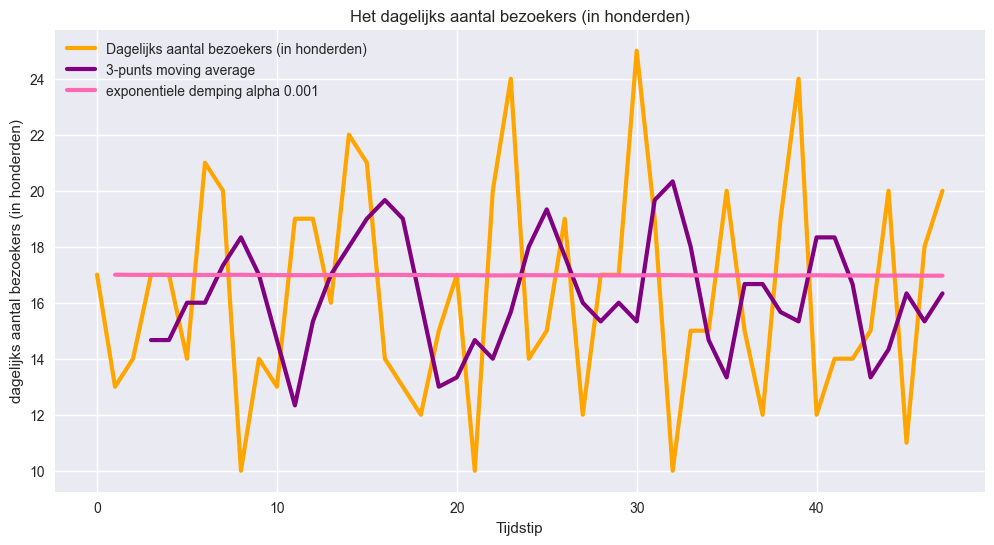

In [153]:
df['dagelijks aantal bezoekers (in honderden)'].plot(color='orange', linewidth=3, figsize=(12,6))
df['MA_3'].plot(color = 'purple', linewidth=3)
df['exponential_0.001'].plot(color = 'hotpink', linewidth=3)
plt.legend(labels = ['Dagelijks aantal bezoekers (in honderden)', '3-punts moving average', 'exponentiele demping alpha 0.001'])
plt.title("Het dagelijks aantal bezoekers (in honderden)")
plt.xlabel(df.index.name)
plt.ylabel(df.columns[0])
sns.set_style("darkgrid")